
=== Zeta Potential Plotter (Triplicate Version) ===

Select all zeta potential files (Ctrl+Click for multiple files)
Files will be automatically grouped by composition and triplicates


File categorization:
  DBPC HMSN: 3 files
    - 1_DBPC HMSN_2025-08-25-16-18-48_.xlsx
    - 2_DBPC HMSN_2025-08-25-16-36-25_.xlsx
    - 3_DBPC HMSN_2025-08-25-16-46-00_.xlsx
  MSN: 3 files
    - 4_MSN_2025-08-25-16-55-45_.xlsx
    - 5_MSN_2025-08-25-17-05-08_.xlsx
    - 6_MSN_2025-08-25-17-14-30_.xlsx

Checking for triplicates...
  ✓ Potential triplicates detected for DBPC HMSN
  ✓ Potential triplicates detected for MSN

Loading all files...

DBPC HMSN files:
  Loaded: 1_DBPC HMSN_2025-08-25-16-18-48_ (535 points, 458 zeros)
  Loaded: 2_DBPC HMSN_2025-08-25-16-36-25_ (541 points, 420 zeros)
  Loaded: 3_DBPC HMSN_2025-08-25-16-46-00_ (539 points, 463 zeros)

MSN files:
  Loaded: 4_MSN_2025-08-25-16-55-45_ (569 points, 475 zeros)
  Loaded: 5_MSN_2025-08-25-17-05-08_ (573 points, 464 zeros)
  Loaded: 6_MS

Show individual curves along with averages? (y/n) [default: n]:  n


Do you want to limit the zeta potential range? (y/n) [default: y]:  
Enter minimum zeta potential in mV [default: -60]:  
Enter maximum zeta potential in mV [default: 60]:  



Using zeta potential range: -60 to 60 mV



Do you want to save the plot? (y/n):  y



Default save location: C:/Users/Talaial Alina/OneDrive - UCB-O365/Courses/Year 1/Fall Semester Aug-Dec 2020/CHEN 5840 - Independent Study/Hydrogels/DLS and Zeta Potential/25AUG25/Zeta
Default filename: Zeta_Potential_Distribution_6files_-60to60mV.png


Enter filename (press Enter for default):  



File already exists. Saving as: Zeta_Potential_Distribution_6files_-60to60mV_14.png

Plot saved to: C:/Users/Talaial Alina/OneDrive - UCB-O365/Courses/Year 1/Fall Semester Aug-Dec 2020/CHEN 5840 - Independent Study/Hydrogels/DLS and Zeta Potential/25AUG25/Zeta\Zeta_Potential_Distribution_6files_-60to60mV_14.png
Size: 2.45" × 1.83" at 600 DPI


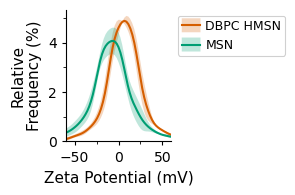


ZETA POTENTIAL STATISTICS SUMMARY
                            File  Category  pH Mean Zeta Potential (mV) Std Deviation (mV)
      4_MSN_2025-08-25-16-55-45_       MSN N/A                   -15.69               1.43
      5_MSN_2025-08-25-17-05-08_       MSN N/A                   -14.51               1.05
      6_MSN_2025-08-25-17-14-30_       MSN N/A                   -14.90               1.40
1_DBPC HMSN_2025-08-25-16-18-48_ DBPC HMSN N/A                    -1.60               2.40
2_DBPC HMSN_2025-08-25-16-36-25_ DBPC HMSN N/A                    -0.67               1.60
3_DBPC HMSN_2025-08-25-16-46-00_ DBPC HMSN N/A                    -0.72               1.05

--------------------------------------------------------------------------------
SUMMARY BY CATEGORY
--------------------------------------------------------------------------------

MSN:
  Average Mean Zeta Potential: -15.03 mV
  Range: -15.69 to -14.51 mV
  Number of samples: 3

DBPC HMSN:
  Average Mean Zeta Potential: -1.

In [18]:
"""
Zeta Potential Plotter for Jupyter Lab - Enhanced Version with Triplicate Support
---------------------------------------------------------------------------------
Modified to handle triplicates and adjustable figure sizes for publication
"""

import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
import os
import re
import warnings

# Suppress matplotlib backend warnings in Jupyter
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# ============== FIGURE SIZE AND FONT CONFIGURATION ==============
# Small panel dimensions for publication
PANEL_W_IN, PANEL_H_IN = 2.45, 1.83
EXPORT_DPI = 600
AXIS_FS, TICK_FS, LEGEND_FS, TITLE_FS = 11, 10, 9, 12

# ============== EXISTING COLOR SCHEMES (kept as is) ==============
# [Keep all your existing color definitions here - they're good as is]

def extract_zeta_statistics(file_path):
    """
    Extract mean zeta potential and standard deviation from Excel file
    Returns tuple of (mean, std_dev) or (None, None) if not found
    """
    # [Keep existing function as is]
    try:
        if file_path.endswith(('.xlsx', '.xls')):
            df_raw = pd.read_excel(file_path, header=None)
            
            for idx in range(min(50, len(df_raw))):
                row = df_raw.iloc[idx]
                row_str = ' '.join(str(cell) for cell in row if pd.notna(cell))
                
                if 'mean zeta potential' in row_str.lower():
                    for col_idx, cell in enumerate(row):
                        if pd.notna(cell) and 'mean zeta potential' in str(cell).lower():
                            if col_idx + 1 < len(row):
                                mean_val = row.iloc[col_idx + 1]
                                if pd.notna(mean_val):
                                    try:
                                        mean_zeta = float(mean_val)
                                        
                                        if idx + 1 < len(df_raw):
                                            next_row = df_raw.iloc[idx + 1]
                                            for col_idx2, cell2 in enumerate(next_row):
                                                if pd.notna(cell2) and 'standard deviation' in str(cell2).lower():
                                                    if col_idx2 + 1 < len(next_row):
                                                        std_val = next_row.iloc[col_idx2 + 1]
                                                        if pd.notna(std_val):
                                                            try:
                                                                std_dev = float(std_val)
                                                                return mean_zeta, std_dev
                                                            except:
                                                                pass
                                    except:
                                        pass
        
        return None, None
    except:
        return None, None

def find_zeta_data_in_excel(file_path):
    """
    Extract zeta potential distribution data from complex Excel files
    Returns DataFrame with 'Zeta Potential' and 'Relative Frequency' columns
    """
    # [Keep existing function as is]
    try:
        df_raw = pd.read_excel(file_path, header=None)
        
        for idx in range(min(50, len(df_raw))):
            row = df_raw.iloc[idx]
            
            zeta_col_idx = None
            freq_col_idx = None
            
            for col_idx, cell in enumerate(row):
                if pd.notna(cell):
                    cell_str = str(cell).lower()
                    if 'zeta potential' in cell_str and 'relative frequency' not in cell_str:
                        zeta_col_idx = col_idx
                    elif 'relative frequency' in cell_str:
                        freq_col_idx = col_idx
            
            if zeta_col_idx is not None and freq_col_idx is not None:
                data_start_row = idx + 2
                
                zeta_data = df_raw.iloc[data_start_row:, zeta_col_idx]
                freq_data = df_raw.iloc[data_start_row:, freq_col_idx]
                
                data = pd.DataFrame({
                    'Zeta Potential': pd.to_numeric(zeta_data, errors='coerce'),
                    'Relative Frequency': pd.to_numeric(freq_data, errors='coerce')
                })
                
                data = data.dropna()
                data = data[(data['Zeta Potential'] >= -600) & (data['Zeta Potential'] <= 600)]
                
                if len(data) > 0:
                    return data
        
        raise ValueError("Could not find zeta potential distribution data in Excel file")
        
    except Exception as e:
        raise Exception(f"Error reading Excel file: {str(e)}")

def load_zeta_data(file_path):
    """
    Load zeta potential data from either Excel or text files
    """
    # [Keep existing function as is]
    try:
        if file_path.endswith(('.xlsx', '.xls')):
            try:
                return find_zeta_data_in_excel(file_path)
            except:
                data = pd.read_excel(file_path, header=None, names=["Zeta Potential", "Relative Frequency"])
                if len(data) > 0:
                    return data
        
        elif file_path.endswith('.txt'):
            for sep in [r'\s+', '\t', ',', ';']:
                try:
                    data = pd.read_csv(file_path, sep=sep, header=None, names=["Zeta Potential", "Relative Frequency"])
                    if len(data) > 0 and data['Zeta Potential'].dtype in [np.float64, np.int64]:
                        return data
                except:
                    continue
        
        raise ValueError("Could not read zeta potential data")
        
    except Exception as e:
        raise Exception(f"Error loading file: {str(e)}")

def extract_ph_from_filename(filename):
    """
    Extract pH value from filename if present
    Returns pH value as string or None if not found
    """
    # [Keep existing function as is]
    ph_patterns = [
        r'ph[_\s]*(\d+\.?\d*)',
        r'ph[_\s]*(\d+)',
    ]
    
    filename_lower = filename.lower()
    for pattern in ph_patterns:
        match = re.search(pattern, filename_lower)
        if match:
            ph_val = match.group(1)
            if '.' in ph_val and ph_val.endswith('0'):
                ph_val = ph_val.rstrip('0').rstrip('.')
            return ph_val
    
    return None

# ============== NEW: TRIPLICATE AVERAGING FUNCTION ==============
def average_triplicates(data_list):
    """
    Average multiple zeta potential measurements at each potential point
    Returns averaged data with standard deviation
    """
    if len(data_list) == 0:
        return None, None
    
    if len(data_list) == 1:
        # Single measurement - no std dev
        df = data_list[0][0]
        avg_df = df.copy()
        avg_df['Std Dev'] = 0
        return avg_df, None
    
    # Extract just the dataframes
    dfs = [item[0] for item in data_list]
    
    # Find common zeta potential range
    min_zeta = max(df['Zeta Potential'].min() for df in dfs)
    max_zeta = min(df['Zeta Potential'].max() for df in dfs)
    
    # Create common zeta potential grid
    all_zetas = pd.concat([df['Zeta Potential'] for df in dfs])
    common_zetas = all_zetas[(all_zetas >= min_zeta) & (all_zetas <= max_zeta)].unique()
    common_zetas = np.sort(common_zetas)
    
    # Interpolate all curves to common grid
    interpolated = []
    for df in dfs:
        f = np.interp(common_zetas, 
                     df['Zeta Potential'].values, 
                     df['Relative Frequency'].values)
        interpolated.append(f)
    
    # Calculate mean and std
    interpolated = np.array(interpolated)
    mean_freq = np.mean(interpolated, axis=0)
    std_freq = np.std(interpolated, axis=0, ddof=1) if len(interpolated) > 1 else np.zeros_like(mean_freq)
    
    # Create averaged dataframe
    avg_df = pd.DataFrame({
        'Zeta Potential': common_zetas,
        'Relative Frequency': mean_freq,
        'Std Dev': std_freq
    })
    
    return avg_df, interpolated

# ============== NEW: GROUP TRIPLICATES FUNCTION ==============
def group_triplicates(data_list):
    """
    Group files that are likely triplicates based on naming patterns
    Returns dictionary with base name as key and list of triplicates as value
    """
    grouped = {}
    
    for data, label, ph_value in data_list:
        # Try to identify base name (remove replicate indicators)
        base_name = label
        
        # Remove common replicate indicators
        replicate_patterns = [
            r'_rep\d+', r'_r\d+', r'_\d+$', r'-\d+$',
            r'_a$', r'_b$', r'_c$', r'_A$', r'_B$', r'_C$'
        ]
        
        for pattern in replicate_patterns:
            base_name = re.sub(pattern, '', base_name, flags=re.IGNORECASE)
        
        # Use base_name + pH as the key for grouping
        group_key = f"{base_name}_pH{ph_value}" if ph_value else base_name
        
        if group_key not in grouped:
            grouped[group_key] = []
        grouped[group_key].append((data, label, ph_value))
    
    return grouped

# [Keep all existing categorize functions as they are]
def categorize_files_smart(file_paths):
    """Smart categorization that properly identifies complex lipid mixtures"""
    # [Keep existing function exactly as is - it's working well]
    categories = {}
    
    for file_path in file_paths:
        filename = os.path.basename(file_path).lower()
        categorized = False
        
        # [All existing categorization logic stays the same]
        # Check for complex mixtures first (most specific patterns)
        if 'dppc' in filename and 'dops' in filename and 'dpm' in filename and 'hmsn' in filename:
            ratio_pattern = r'pH\s*\d+(?:\.\d+)?[_\s]+(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)'
            ratio_match = re.search(ratio_pattern, filename, re.IGNORECASE)
            if not ratio_match:
                ratio_pattern = r'^\d+_(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)'
                ratio_match = re.search(ratio_pattern, filename)
            
            if ratio_match:
                r1 = float(ratio_match.group(1))
                r2 = float(ratio_match.group(2))
                r3 = float(ratio_match.group(3))
                r1_str = f"{r1:.0f}" if r1 == int(r1) else f"{r1}"
                r2_str = f"{r2:.0f}" if r2 == int(r2) else f"{r2}"
                r3_str = f"{r3:.0f}" if r3 == int(r3) else f"{r3}"
                category = f"{r1_str}:{r2_str}:{r3_str} DPPC/DOPS/DPM HMSN"
            else:
                category = 'DPPC/DOPS/DPM HMSN'
            categorized = True
            
        # [Continue with all other categorization logic exactly as before]
        elif 'dppc' in filename and 'dotap' in filename and 'dpm' in filename and 'hmsn' in filename:
            ratio_pattern = r'pH\s*\d+(?:\.\d+)?[_\s]+(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)'
            ratio_match = re.search(ratio_pattern, filename, re.IGNORECASE)
            if not ratio_match:
                ratio_pattern = r'^\d+_(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)_(\d+(?:\.\d+)?)'
                ratio_match = re.search(ratio_pattern, filename)
            
            if ratio_match:
                r1 = float(ratio_match.group(1))
                r2 = float(ratio_match.group(2))
                r3 = float(ratio_match.group(3))
                r1_str = f"{r1:.0f}" if r1 == int(r1) else f"{r1}"
                r2_str = f"{r2:.0f}" if r2 == int(r2) else f"{r2}"
                r3_str = f"{r3:.0f}" if r3 == int(r3) else f"{r3}"
                category = f"{r1_str}:{r2_str}:{r3_str} DPPC/DOTAP/DPM HMSN"
            else:
                category = 'DPPC/DOTAP/DPM HMSN'
            categorized = True
            
        elif 'dbpc' in filename and 'hmsn' in filename:
            category = 'DBPC HMSN'
            categorized = True
        elif 'dppc' in filename and 'hmsn' in filename:
            category = 'DPPC HMSN'
            categorized = True
        elif 'msn' in filename:
            category = 'MSN'
            categorized = True
        elif 'hmsn' in filename:
            category = 'HMSN'
            categorized = True
        elif 'dppc' in filename:
            category = 'DPPC'
            categorized = True
        elif 'dbpc' in filename:
            category = 'DBPC'
            categorized = True
        else:
            category = 'Other'
            
        if category not in categories:
            categories[category] = []
        categories[category].append(file_path)
    
    return categories

# ============== MODIFIED: CREATE PLOT WITH TRIPLICATES ==============
def create_plot_with_triplicates(data_by_category, title, weighting_choice, max_diameter=None):
    """Create plot with averaged triplicates and error regions"""
    
    from matplotlib.lines import Line2D
    import matplotlib.patches as mpatches
    
    # Custom legend handler class for shaded error bars
    class LineWithShade:
        def __init__(self, color, has_shade=True):
            self.color = color
            self.has_shade = has_shade
            
        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            width, height = handlebox.width, handlebox.height
            
            # Create the shaded background if needed
            if self.has_shade:
                shade = mpatches.FancyBboxPatch(
                    (x0, y0 - height * 0.3), width, height * 1.6,
                    boxstyle="round,pad=0", 
                    facecolor=self.color, 
                    alpha=0.25,
                    edgecolor='none',
                    transform=handlebox.get_transform()
                )
                handlebox.add_artist(shade)
            
            # Create the solid line
            line = Line2D([x0, x0 + width], [y0 + height/2, y0 + height/2],
                         color=self.color, linewidth=1.2,
                         transform=handlebox.get_transform())
            handlebox.add_artist(line)
            
            return line
    
    fig, ax = plt.subplots(figsize=(PANEL_W_IN, PANEL_H_IN))
    
    # Colors
    category_colors = {
        'DBPC HMSN': '#D55E00',  # Orange
        'DPPC HMSN': '#D55E00',  # Orange
        'MSN': '#009E73',         # Green
        'HMSN': '#0072B2',        # Blue
        'Other': '#999999'        # Grey
    }
    
    legend_handles = []
    legend_labels = []
    legend_handler_map = {}
    
    for cat_idx, (category, data_list) in enumerate(data_by_category.items()):
        if not data_list:
            continue
        
        color = category_colors.get(category, '#666666')
        
        # Average the triplicates
        avg_data, individual_curves = average_triplicates(data_list)
        
        if avg_data is not None:
            # Apply diameter filter if specified
            if max_diameter:
                avg_data = avg_data[avg_data["Diameter (nm)"] <= max_diameter]
            
            if len(avg_data) == 0:
                continue
            
            # Plot average curve
            line = ax.plot(
                avg_data["Diameter (nm)"],
                avg_data["Relative Frequency"],
                color=color,
                linewidth=1.2,
                linestyle='-'
            )[0]
            
            # Add shaded error region if we have triplicates
            if len(data_list) > 1:
                ax.fill_between(
                    avg_data["Diameter (nm)"],
                    avg_data["Relative Frequency"] - avg_data["Std Dev"],
                    avg_data["Relative Frequency"] + avg_data["Std Dev"],
                    color=color,
                    alpha=0.25,
                    edgecolor='none'
                )
                # Create custom handle with shade
                handle = Line2D([0], [0], color=color)
                legend_handler_map[handle] = LineWithShade(color, has_shade=True)
                legend_handles.append(handle)
            else:
                # Just normal line if no error bars
                handle = Line2D([0], [0], color=color)
                legend_handler_map[handle] = LineWithShade(color, has_shade=False)
                legend_handles.append(handle)
            
            legend_labels.append(category)
    
    # Formatting
    ax.set_xlabel("Particle Diameter (nm)", fontsize=AXIS_FS)
    ax.set_ylabel(f"Relative Frequency\n{weighting_choice} (%)", fontsize=AXIS_FS, labelpad=5)
    
    ax.set_ylim(bottom=0)
    
    if max_diameter:
        ax.set_xlim(left=0, right=max_diameter)
    
    ax.tick_params(axis='both', which='major', labelsize=TICK_FS, length=3, width=0.8, direction='out')
    ax.tick_params(axis='both', which='minor', length=2, width=0.6, direction='out')
    ax.grid(False)
    
    for sp in ax.spines.values():
        sp.set_linewidth(0.8)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set up minor ticks properly
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    
    # Legend with custom handler for shaded error bars
    leg = ax.legend(
        legend_handles,
        legend_labels,
        handler_map=legend_handler_map,
        fontsize=LEGEND_FS,
        loc='upper left',
        bbox_to_anchor=(1.005, 1),
        frameon=True,
        fancybox=True,
        framealpha=1.0,
        handlelength=1.5,
        handletextpad=0.4,
        borderpad=0.3
    )
    leg.get_frame().set_edgecolor("#D0D0D0")
    leg.get_frame().set_linewidth(0.8)
    
    # Margins adjusted for better spine lengths
    fig.subplots_adjust(left=0.20, right=0.65, bottom=0.22, top=0.96)
    
    # No title
    
    return fig

# ============== MODIFIED MAIN FUNCTION ==============
def plot_zeta_potentials():
    """
    Main function to select files and plot zeta potential distributions
    Now with triplicate support
    """
    # Create root window for file selection only
    root = tk.Tk()
    root.withdraw()
    root.attributes('-topmost', True)
    root.lift()
    root.focus_force()
    root.update()
    
    try:
        default_dir = r"C:\Users\Talaial Alina\OneDrive - UCB-O365\Courses\Year 1\Fall Semester Aug-Dec 2020\CHEN 5840 - Independent Study\Hydrogels\DLS and Zeta Potential"
        
        if not os.path.exists(default_dir):
            default_dir = os.getcwd()
        
        print("\n=== Zeta Potential Plotter (Triplicate Version) ===")
        print("\nSelect all zeta potential files (Ctrl+Click for multiple files)")
        print("Files will be automatically grouped by composition and triplicates\n")
        
        all_files = filedialog.askopenfilenames(
            parent=root,
            initialdir=default_dir,
            title="Select all zeta potential files",
            filetypes=[("Excel files", "*.xlsx *.xls"), ("Text files", "*.txt"), ("All files", "*.*")]
        )
        
        root.destroy()
        
        if not all_files:
            print("No files selected. Exiting.")
            return
        
        save_dir = os.path.dirname(all_files[0])
        
        # Categorize files
        file_categories = categorize_files_smart(all_files)
        
        print("\nFile categorization:")
        for category, files in file_categories.items():
            print(f"  {category}: {len(files)} files")
            for f in files:
                print(f"    - {os.path.basename(f)}")
        
        # Check for potential triplicates
        print("\n" + "="*50)
        print("Checking for triplicates...")
        for category, files in file_categories.items():
            if len(files) == 3:
                print(f"  ✓ Potential triplicates detected for {category}")
            elif len(files) % 3 == 0 and len(files) > 3:
                print(f"  ✓ Multiple sets of potential triplicates for {category} ({len(files)//3} sets)")
        
        # Load all data files by category
        data_by_category = {}
        statistics_data = []
        
        print(f"\nLoading all files...")
        for category, file_paths in file_categories.items():
            data_by_category[category] = []
            print(f"\n{category} files:")
            
            for file_path in file_paths:
                try:
                    data = load_zeta_data(file_path)
                    filename = os.path.basename(file_path)
                    label = filename.split('.')[0]
                    ph_value = extract_ph_from_filename(filename)
                    
                    mean_zeta, std_dev = extract_zeta_statistics(file_path)
                    
                    statistics_data.append({
                        'File': label,
                        'Category': category,
                        'pH': ph_value if ph_value else 'N/A',
                        'Mean Zeta Potential (mV)': f"{mean_zeta:.2f}" if mean_zeta is not None else 'N/A',
                        'Std Deviation (mV)': f"{std_dev:.2f}" if std_dev is not None else 'N/A'
                    })
                    
                    data_by_category[category].append((data, label, ph_value))
                    zeros_count = (data['Relative Frequency'] == 0).sum()
                    ph_info = f" (pH {ph_value})" if ph_value else ""
                    print(f"  Loaded: {label}{ph_info} ({len(data)} points, {zeros_count} zeros)")
                except Exception as e:
                    print(f"  Failed to load {os.path.basename(file_path)}: {e}")
        
        total_loaded = sum(len(data_list) for data_list in data_by_category.values())
        if total_loaded == 0:
            print("\nError: No valid data files could be loaded")
            return
        
        # Ask about showing individual curves
        print("\n" + "="*50)
        show_individual = input("Show individual curves along with averages? (y/n) [default: n]: ").strip().lower() == 'y'
        
        # Ask for voltage range
        print("\n" + "="*50)
        limit_range = input("Do you want to limit the zeta potential range? (y/n) [default: y]: ").strip().lower()
        if limit_range == '' or limit_range == 'y':
            min_input = input("Enter minimum zeta potential in mV [default: -60]: ").strip()
            max_input = input("Enter maximum zeta potential in mV [default: 60]: ").strip()
            
            try:
                min_voltage = float(min_input) if min_input else -60
                max_voltage = float(max_input) if max_input else 60
            except ValueError:
                print("Invalid input. Using default range: -60 to 60 mV")
                min_voltage = -60
                max_voltage = 60
        else:
            min_voltage = -600
            max_voltage = 600
        
        print(f"\nUsing zeta potential range: {min_voltage} to {max_voltage} mV")
        
        # Create main plot with triplicates
        fig = create_plot_with_triplicates(
            data_by_category, 
            "Zeta Potential Distribution Comparison",
            min_voltage, 
            max_voltage,
            show_individual=show_individual
        )
        
        # Ask to save main plot
        print("\n" + "="*50)
        save_plot = input("Do you want to save the plot? (y/n): ").strip().lower()
        if save_plot == 'y':
            range_info = f"_{int(min_voltage)}to{int(max_voltage)}mV" if (min_voltage != -600 or max_voltage != 600) else ""
            default_filename = f"Zeta_Potential_Distribution_{total_loaded}files{range_info}.png"
            
            print(f"\nDefault save location: {save_dir}")
            print(f"Default filename: {default_filename}")
            
            custom_name = input("Enter filename (press Enter for default): ").strip()
            if custom_name:
                if not custom_name.endswith(('.png', '.pdf')):
                    custom_name += '.png'
                output_path = os.path.join(save_dir, custom_name)
            else:
                output_path = os.path.join(save_dir, default_filename)
            
            if os.path.exists(output_path):
                base_name, ext = os.path.splitext(output_path)
                counter = 1
                while os.path.exists(f"{base_name}_{counter}{ext}"):
                    counter += 1
                output_path = f"{base_name}_{counter}{ext}"
                print(f"\nFile already exists. Saving as: {os.path.basename(output_path)}")
            
            if output_path.endswith('.pdf'):
                fig.savefig(output_path, dpi=EXPORT_DPI, bbox_inches='tight', format='pdf')
            else:
                fig.savefig(output_path, dpi=EXPORT_DPI, bbox_inches='tight')
            print(f"\nPlot saved to: {output_path}")
            print(f"Size: {PANEL_W_IN}\" × {PANEL_H_IN}\" at {EXPORT_DPI} DPI")
        
        plt.show()
        
        # Display statistics summary
        print("\n" + "="*80)
        print("ZETA POTENTIAL STATISTICS SUMMARY")
        print("="*80)
        
        if statistics_data:
            stats_df = pd.DataFrame(statistics_data)
            
            # Sort by category and pH
            def sort_key(row):
                category_order = {'MSN': 0, 'HMSN': 1, 'DPPC': 2, 'DBPC': 3, 'DPPC HMSN': 4, 'DBPC HMSN': 5, 'Other': 6}
                if 'DPPC/DOPS/DPM HMSN' in row['Category']:
                    cat_val = 0.5
                elif 'DPPC/DOTAP/DPM HMSN' in row['Category']:
                    cat_val = 0.6
                else:
                    cat_val = category_order.get(row['Category'], 7)
                
                try:
                    ph_val = float(row['pH']) if row['pH'] != 'N/A' else 999
                except:
                    ph_val = 999
                return (cat_val, ph_val)
            
            stats_df['sort_key'] = stats_df.apply(sort_key, axis=1)
            stats_df = stats_df.sort_values('sort_key').drop('sort_key', axis=1)
            
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', None)
            pd.set_option('display.max_colwidth', None)
            
            print(stats_df.to_string(index=False))
            
            # Summary by category
            print("\n" + "-"*80)
            print("SUMMARY BY CATEGORY")
            print("-"*80)
            
            for category in stats_df['Category'].unique():
                cat_data = stats_df[stats_df['Category'] == category]
                print(f"\n{category}:")
                
                mean_values = []
                for val in cat_data['Mean Zeta Potential (mV)']:
                    if val != 'N/A':
                        try:
                            mean_values.append(float(val))
                        except:
                            pass
                
                if mean_values:
                    avg_mean = np.mean(mean_values)
                    print(f"  Average Mean Zeta Potential: {avg_mean:.2f} mV")
                    print(f"  Range: {min(mean_values):.2f} to {max(mean_values):.2f} mV")
                print(f"  Number of samples: {len(cat_data)}")
        
        print("\n" + "="*50)
        print("All plotting complete!")
        print("\nNote: Averaged data shown as mean ± SD for grouped measurements")
        
    except Exception as e:
        print(f"\nError: {str(e)}")
        if 'root' in locals():
            try:
                root.destroy()
            except:
                pass

if __name__ == "__main__":
    plot_zeta_potentials()